In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/weatherAUS.csv')

In [ ]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [ ]:
print(df.isnull().sum())

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64


Imputing Numerical Columns with median of that column

In [ ]:
from sklearn.impute import SimpleImputer
n = SimpleImputer(strategy='median')
numerical = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed',
                  'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
                  'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
                  'Temp9am', 'Temp3pm']
df[numerical] = n.fit_transform(df[numerical])

In [ ]:
print(df.isnull().sum())

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir       9330
WindGustSpeed        0
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64


Impute categorical column with the mode

In [ ]:
cat= SimpleImputer(strategy='most_frequent')
categorical= ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
df[categorical] = cat.fit_transform(df[categorical])

In [ ]:
print(df.isnull().sum())

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64


In [ ]:
unique = df['Location'].unique()
print(unique)

['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.drop(columns=['Date'], inplace=True)

In [ ]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,4.8,8.5,W,44.0,W,WNW,...,8.0,5.0,16.9,21.8,No,0.0,No,2008,12,1
1,Albury,7.4,25.1,0.0,4.8,8.5,WNW,44.0,NNW,WSW,...,5.0,5.0,17.2,24.3,No,0.0,No,2008,12,2
2,Albury,12.9,25.7,0.0,4.8,8.5,WSW,46.0,W,WSW,...,5.0,2.0,21.0,23.2,No,0.0,No,2008,12,3
3,Albury,9.2,28.0,0.0,4.8,8.5,NE,24.0,SE,E,...,5.0,5.0,18.1,26.5,No,1.0,No,2008,12,4
4,Albury,17.5,32.3,1.0,4.8,8.5,W,41.0,ENE,NW,...,7.0,8.0,17.8,29.7,No,0.2,No,2008,12,5


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label= LabelEncoder()
categorical1= ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
for col in categorical1:
    df[col] = label.fit_transform(df[col])

In [ ]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Year,Month,Day
0,2,13.4,22.9,0.6,4.8,8.5,13,44.0,13,14,...,8.0,5.0,16.9,21.8,0,0.0,No,2008,12,1
1,2,7.4,25.1,0.0,4.8,8.5,14,44.0,6,15,...,5.0,5.0,17.2,24.3,0,0.0,No,2008,12,2
2,2,12.9,25.7,0.0,4.8,8.5,15,46.0,13,15,...,5.0,2.0,21.0,23.2,0,0.0,No,2008,12,3
3,2,9.2,28.0,0.0,4.8,8.5,4,24.0,9,0,...,5.0,5.0,18.1,26.5,0,1.0,No,2008,12,4
4,2,17.5,32.3,1.0,4.8,8.5,13,41.0,1,7,...,7.0,8.0,17.8,29.7,0,0.2,No,2008,12,5


In [ ]:
unique1= df['WindGustDir'].unique()
print(unique1)

[13 14 15  4  6  3  5 12  1 10  8  7  9  2  0 11]


In [ ]:
df['RainTomorrow'] = label.fit_transform(df['RainTomorrow'])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

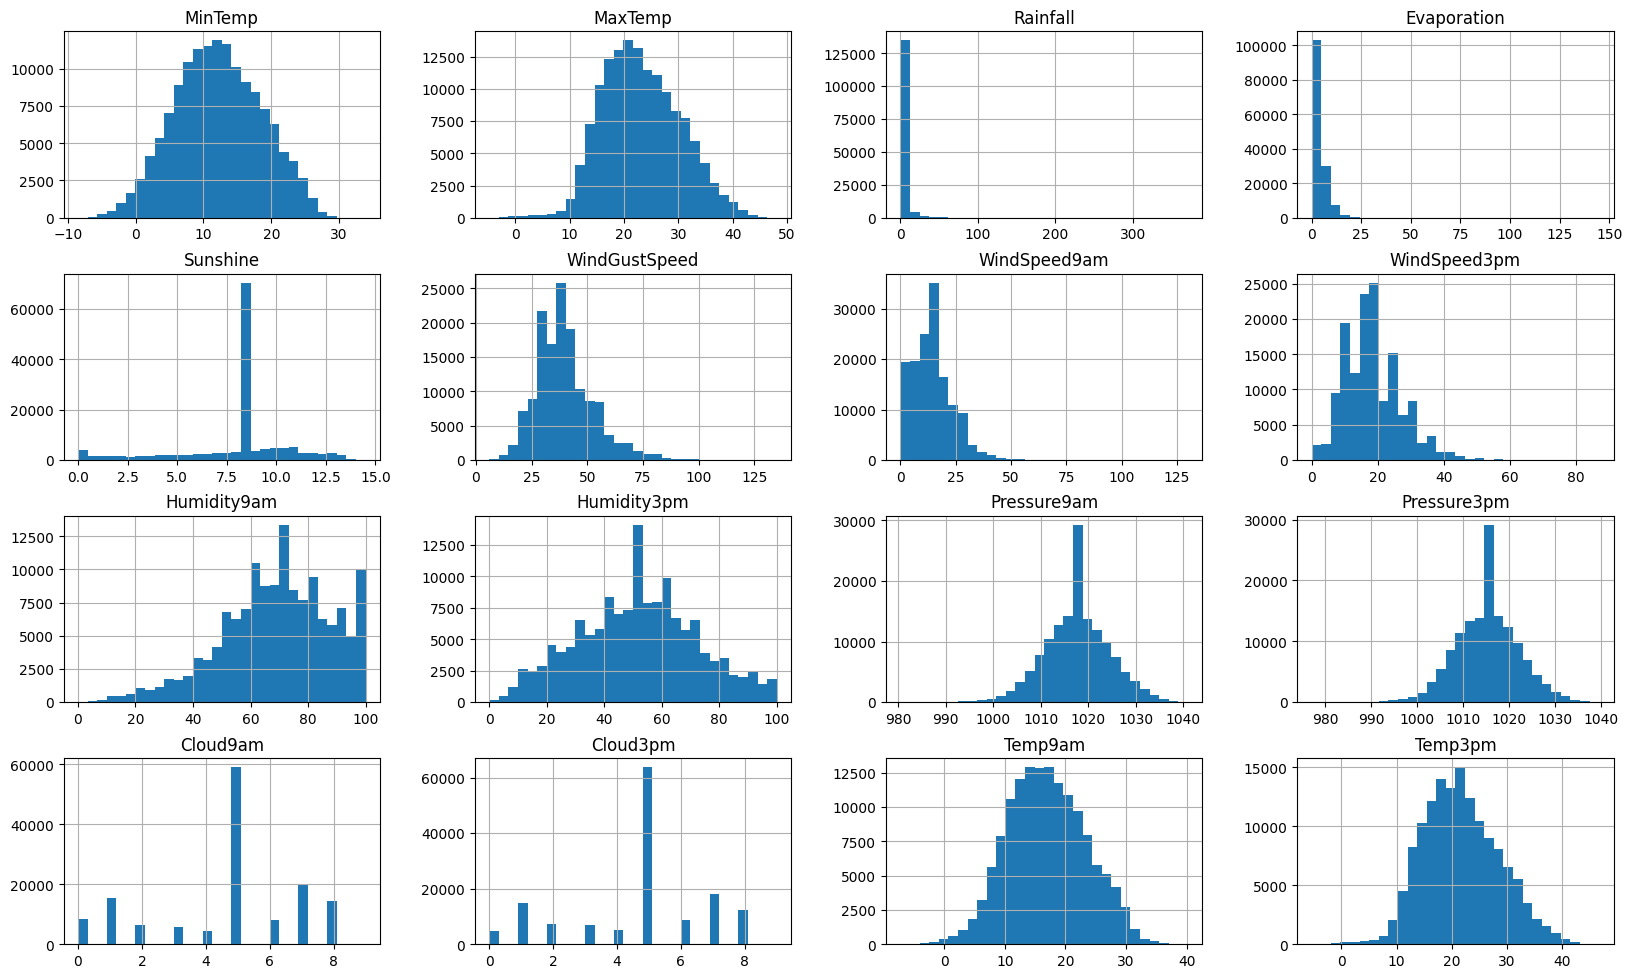

In [ ]:
df[numerical].hist(figsize=(20, 15), bins=30, layout=(5, 4))
plt.show()

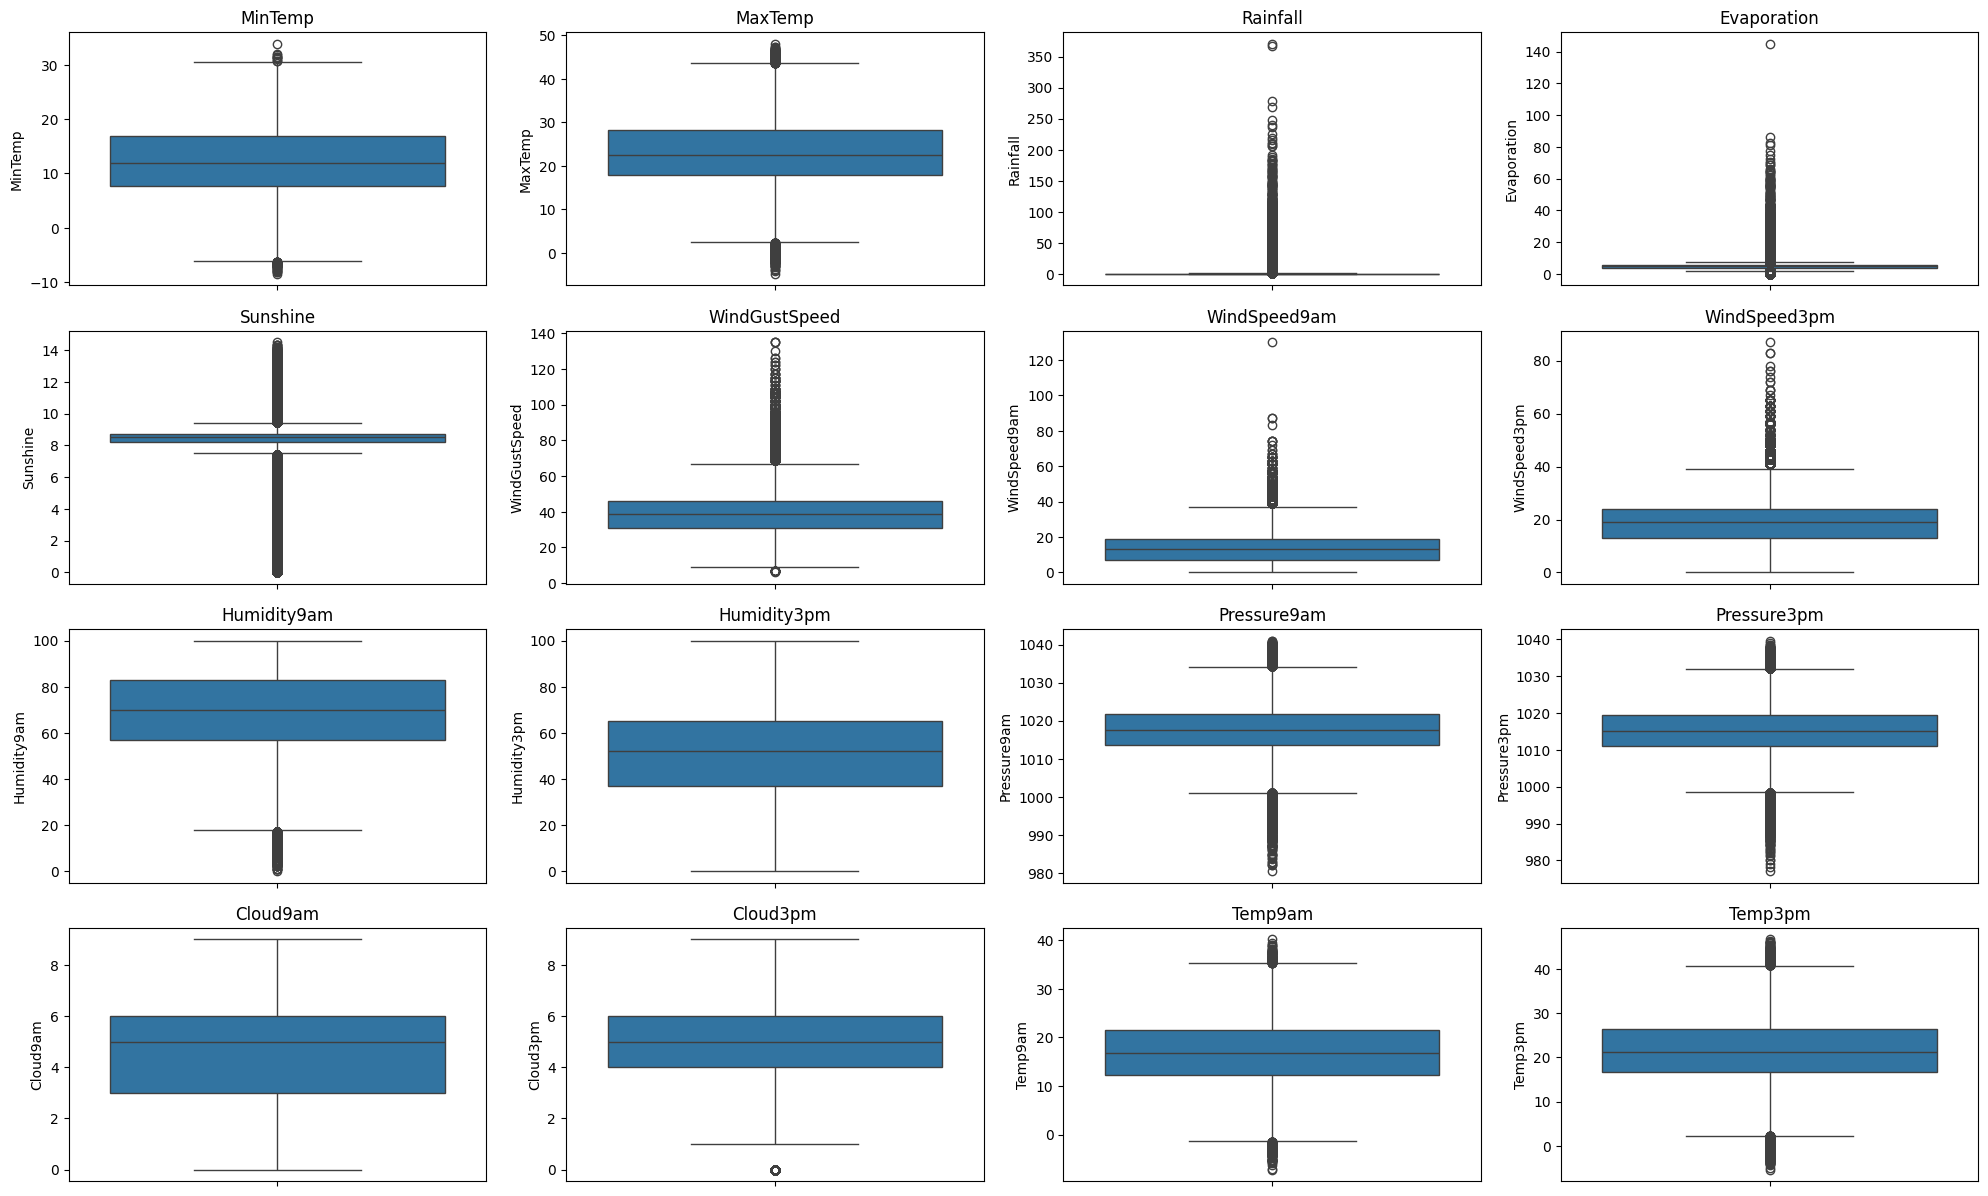

In [ ]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical, 1):
     plt.subplot(5, 4, i)
     sns.boxplot(y=df[col])
     plt.title(col)
plt.tight_layout()
plt.show()

In [ ]:
print(df.isnull().sum())

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
Year             0
Month            0
Day              0
dtype: int64


In [ ]:
print(df.dtypes)

Location           int64
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir        int64
WindGustSpeed    float64
WindDir9am         int64
WindDir3pm         int64
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday          int64
RISK_MM          float64
RainTomorrow       int64
Year               int32
Month              int32
Day                int32
dtype: object


In [ ]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Year,Month,Day
0,2,13.4,22.9,0.6,4.8,8.5,13,44.0,13,14,...,8.0,5.0,16.9,21.8,0,0.0,0,2008,12,1
1,2,7.4,25.1,0.0,4.8,8.5,14,44.0,6,15,...,5.0,5.0,17.2,24.3,0,0.0,0,2008,12,2
2,2,12.9,25.7,0.0,4.8,8.5,15,46.0,13,15,...,5.0,2.0,21.0,23.2,0,0.0,0,2008,12,3
3,2,9.2,28.0,0.0,4.8,8.5,4,24.0,9,0,...,5.0,5.0,18.1,26.5,0,1.0,0,2008,12,4
4,2,17.5,32.3,1.0,4.8,8.5,13,41.0,1,7,...,7.0,8.0,17.8,29.7,0,0.2,0,2008,12,5


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Trained the data on Logistic regression model.

In [ ]:
X = df.drop(columns=['RainTomorrow'])
y = df['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'F1 Score: {f1}')

Accuracy: 0.9974916779970932
Precision: 0.9951629863301787
F1 Score: 0.9943787759390595


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Looking upon the values found that the while training the data is overfitting or leaking somewhere.

So applied 2 other models which are Random Forest and XG Boost.

In [ ]:
X = df.drop(columns=['RainTomorrow'])
y = df['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

random = RandomForestClassifier()
xgboost = XGBClassifier()

random.fit(X_train, y_train)
xgboost.fit(X_train, y_train)

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'F1 Score: {f1}')

print("Random Forest:")
evaluate_model(random, X_test, y_test)
print()
print("XGBoost:")
evaluate_model(xgboost, X_test, y_test)

Random Forest:
Accuracy: 0.9999765577382906
Precision: 1.0
F1 Score: 0.999947503805974

XGBoost:
Accuracy: 0.9999296732148718
Precision: 1.0
F1 Score: 0.9998424948810836


Looking upon the same problem again with this too model

Performed cross validation on the models

In [ ]:
from sklearn.model_selection import cross_val_score

logic_score = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f'Logistic Regression CV Accuracy: {logic_score.mean()}')

random_score = cross_val_score(random, X, y, cv=5, scoring='accuracy')
print(f'Random Forest CV Accuracy: {random_score.mean()}')

xgboost_score = cross_val_score(xgboost, X, y, cv=5, scoring='accuracy')
print(f'XGBoost CV Accuracy: {xgboost_score.mean()}')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression CV Accuracy: 0.9952669817232452
Random Forest CV Accuracy: 0.9999859343132428
XGBoost CV Accuracy: 0.9999437377475628


Again after cross validation encounterd the same problem

Then the Feature Importance while traning the data

In [ ]:
random_imp= random.feature_importances_
random_feature= pd.DataFrame({'Feature': X.columns, 'Importance': random_imp})
random_feature.sort_values(by='Importance', ascending=False, inplace=True)
print(random_feature)
print()
xgboost_imp = xgboost.feature_importances_
xgboost_feature = pd.DataFrame({'Feature': X.columns, 'Importance': xgboost_imp})
xgboost_feature.sort_values(by='Importance', ascending=False, inplace=True)
print(xgboost_feature)

          Feature  Importance
21        RISK_MM    0.798517
13    Humidity3pm    0.068897
3        Rainfall    0.024329
20      RainToday    0.017463
5        Sunshine    0.014372
17       Cloud3pm    0.013880
15    Pressure3pm    0.010127
12    Humidity9am    0.009863
7   WindGustSpeed    0.008360
14    Pressure9am    0.006700
19        Temp3pm    0.003848
16       Cloud9am    0.003167
2         MaxTemp    0.002786
1         MinTemp    0.002675
18        Temp9am    0.002219
11   WindSpeed3pm    0.001669
0        Location    0.001515
4     Evaporation    0.001432
9      WindDir3pm    0.001340
24            Day    0.001320
10   WindSpeed9am    0.001260
8      WindDir9am    0.001256
6     WindGustDir    0.001118
23          Month    0.000994
22           Year    0.000894

          Feature  Importance
21        RISK_MM    0.996465
0        Location    0.000381
22           Year    0.000369
11   WindSpeed3pm    0.000342
23          Month    0.000324
14    Pressure9am    0.000303
15    Pre

Analyised that the column RISK_MM have a large impact on the data so this may be the reason for the data infulence and getting accuracy like 0.99

Removing the column and then observing the accuracy in each model.

In [ ]:
X_drop = X.drop(columns=['RISK_MM'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_drop, y, test_size=0.3, random_state=42)

xgboost= XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

xgboost.fit(X_train, y_train)

xgboost_pred = xgboost.predict(X_test)

print(f"XGBoost Accuracy: {accuracy_score(y_test, xgboost_pred)}")

XGBoost Accuracy: 0.8590416803413193
